In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#openCV2

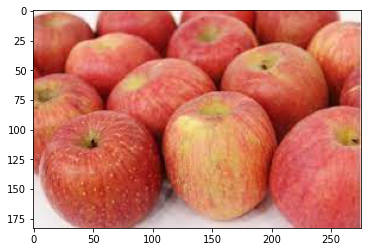

In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import os

PATH = '/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/crowlingdata'
image_list = os.listdir(PATH)
image_PATH = PATH +'/'+ image_list[1]
image = Image.open(image_PATH)
img = cv2.imread(image_PATH)
plt.imshow(image)

#신비한 CV2로 RGB 읽는법

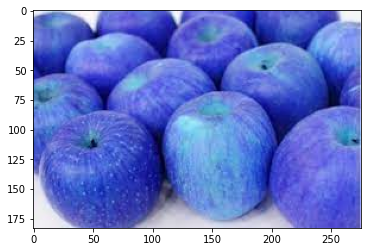

In [91]:
plt.imshow(img)

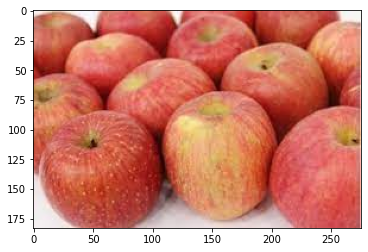

In [92]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

#CV2로 읽고 Gray스케일하기

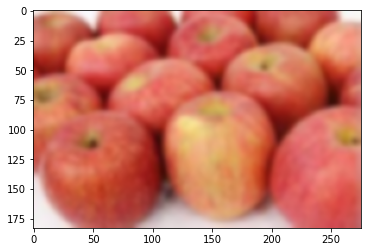

In [93]:
sigma = 2
filtered = cv2.GaussianBlur(rgb_img,(0, 0), sigma)
plt.figure(sigma-1)
imgplot = plt.imshow(filtered)
plt.show()

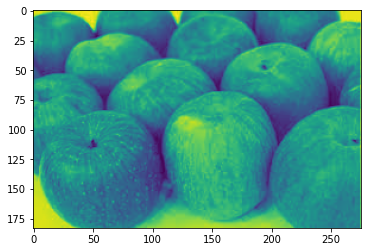

In [113]:
gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

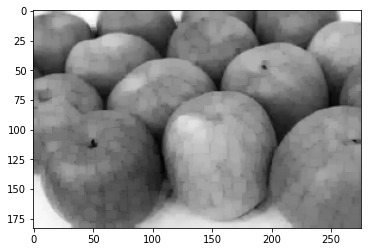

In [134]:
# 노이즈 제거
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(opening, cmap='gray')

# 쓰레쉬 홀드에 조정이 필요할 듯 하다

##쓰레쉬홀드1

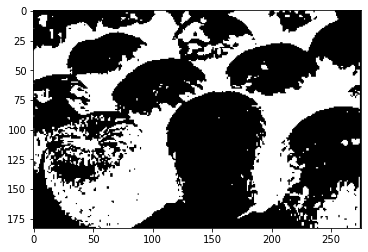

In [140]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

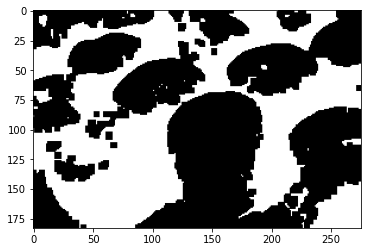

In [128]:
ret, thresh = cv2.threshold(opening, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

##쓰레쉬홀드2

In [129]:
img_arr = np.array(opening)

img_arr[0][0]

233

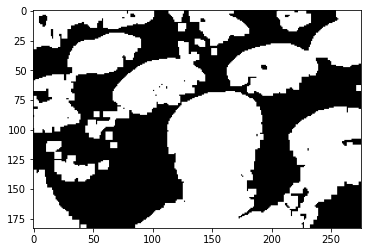

In [144]:
ret, thresh = cv2.threshold(opening, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

#Marker

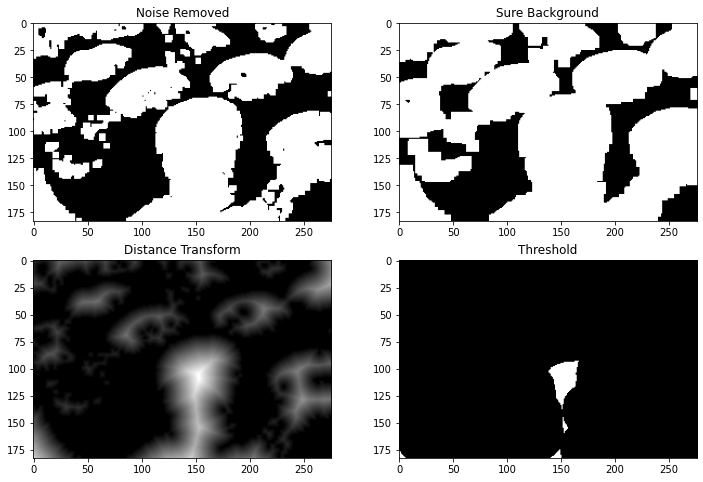

In [145]:
# 노이즈 제거
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 배경이 확실한 영역
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 전경이 확실한 영역 찾기
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

#모르겠는 영역 찾기
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(opening, cmap='gray')
plt.title("Noise Removed")
plt.subplot(222), plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
plt.subplot(223), plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.subplot(224), plt.imshow(sure_fg, cmap='gray')
plt.title("Threshold")
plt.show()

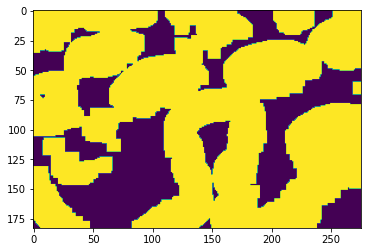

In [146]:
plt.imshow(unknown)

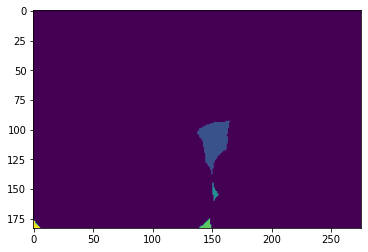

In [147]:
# Marker 라벨링
ret, markers = cv2.connectedComponents(sure_fg)

plt.imshow(markers)

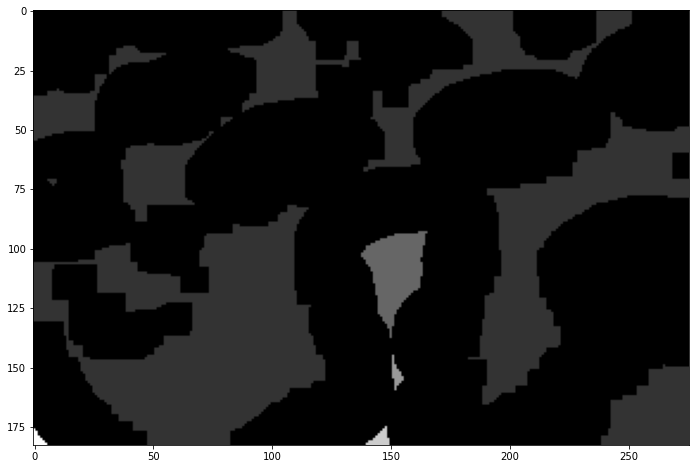

In [148]:
#모든 라벨에 1을 더하여 배경이 0이 아니라 1이 되도록 한다.
#unknown 지역과 같은 값을 가지는 것을 피하기 위해
markers += 1

#이제 unknown 지역을 0으로 마크한다.
markers[unknown==255] = 0

plt.figure(figsize=(12, 8))
plt.imshow(markers, cmap='gray')
plt.show()

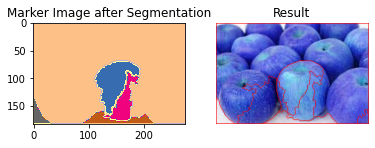

In [149]:
markers = cv2.watershed(img, markers)
img[markers==-1] = [255, 0, 0]
plt.subplot(121), plt.imshow(markers, cmap='Accent')
plt.title('Marker Image after Segmentation')
plt.subplot(122), plt.imshow(img)
plt.title('Result'), plt.axis('off')
plt.show()

#TEST

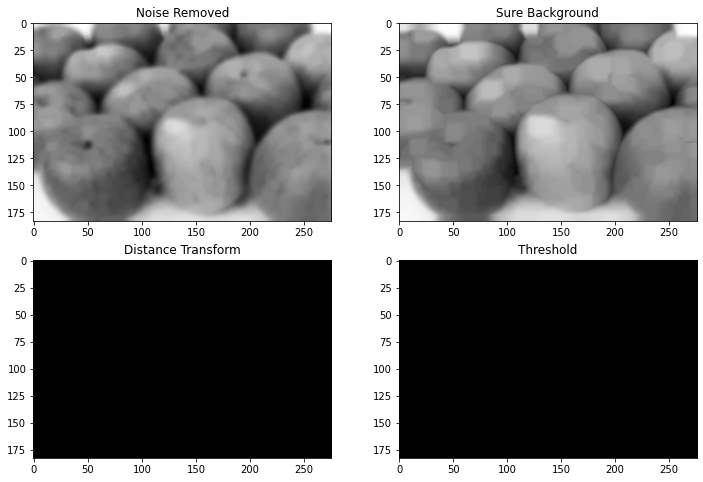

In [112]:
# 노이즈 제거
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)

# 배경이 확실한 영역
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 전경이 확실한 영역 찾기
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

#모르겠는 영역 찾기
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(opening, cmap='gray')
plt.title("Noise Removed")
plt.subplot(222), plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
plt.subplot(223), plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.subplot(224), plt.imshow(sure_fg, cmap='gray')
plt.title("Threshold")
plt.show()